In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
white_wine_trans = pd.read_csv('transformed_wine_data/white_wine_trans.csv')
red_wine_trans = pd.read_csv('transformed_wine_data/red_wine_trans.csv')

In [5]:
X_white = white_wine_trans.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans['quality_label']

X_red = red_wine_trans.drop(['quality_label', 'quality', 'type'], axis = 1)
y_red = red_wine_trans['quality_label']

<h3> Support Vector Machines </h3>

<h3> Red Wine  </h3>

In [7]:
# Working with red wine data
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=101)

In [8]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
svm_model = SVC()
svm_model.fit(scaled_X_train,y_train)

SVC()

In [10]:
y_pred = svm_model.predict(scaled_X_test)

In [11]:
accuracy_score(y_test,y_pred)

0.5916666666666667

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.00      0.00      0.00        24
lower_middle       0.68      0.73      0.70       208
      middle       0.53      0.63      0.57       180
upper_middle       0.50      0.30      0.38        63

    accuracy                           0.59       480
   macro avg       0.34      0.33      0.33       480
weighted avg       0.56      0.59      0.57       480



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3> Explore different hyperparameters </h3>

In [15]:
# Linear Kernel with various C values
C_vals = list(np.linspace(0.01, 50, 10))
test_errors = []
train_errors = []

for C in C_vals: 
    svm_model = SVC(kernel = 'linear', C = C)
    svm_model.fit(scaled_X_train,y_train)

    y_pred_train = svm_model.predict(scaled_X_train)
    y_pred_test = svm_model.predict(scaled_X_test)

    error_train = 1 - accuracy_score (y_pred_train, y_train)
    error_test = 1 - accuracy_score (y_pred_test, y_test)
    
    train_errors.append(error_train)
    test_errors.append(error_test)

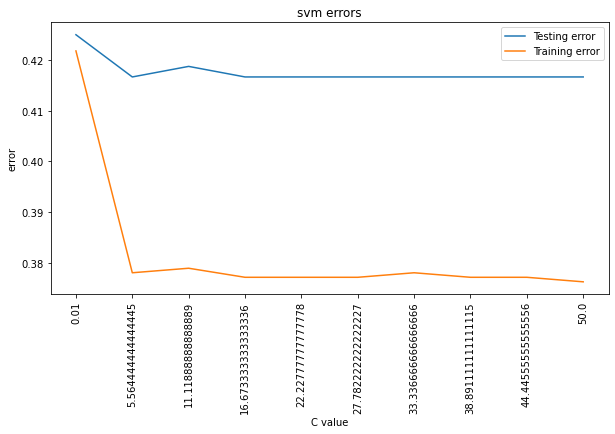

In [21]:
plt.figure(figsize = (10,5))
plt.title("svm errors")
plt.plot(C_vals, test_errors, label="Testing error")
plt.plot(C_vals, train_errors, label="Training error")
plt.legend()
plt.xticks(ticks = C_vals, labels = C_vals)
plt.xticks(rotation = 90)
plt.xlabel("C value")
plt.ylabel("error")
plt.show()

In [22]:
# rbf Kernel with various C values
C_vals = list(np.linspace(0.01, 50, 20))
test_errors = []
train_errors = []

for C in C_vals: 
    svm_model = SVC(kernel = 'rbf', C = C)
    svm_model.fit(scaled_X_train,y_train)

    y_pred_train = svm_model.predict(scaled_X_train)
    y_pred_test = svm_model.predict(scaled_X_test)

    error_train = 1 - accuracy_score (y_pred_train, y_train)
    error_test = 1 - accuracy_score (y_pred_test, y_test)
    
    train_errors.append(error_train)
    test_errors.append(error_test)

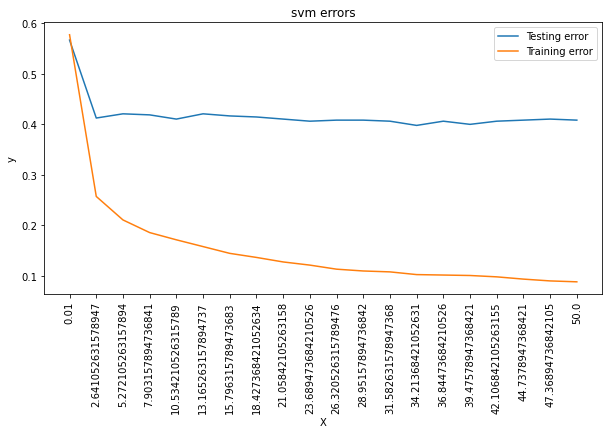

In [23]:
plt.figure(figsize = (10,5))
plt.title("svm errors")
plt.plot(C_vals, test_errors, label="Testing error")
plt.plot(C_vals, train_errors, label="Training error")
plt.legend()
plt.xticks(ticks = C_vals, labels = C_vals)
plt.xticks(rotation = 90)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [35]:
min(test_errors)

0.3979166666666667

With rbf kernel, you can reach a minimum test error of around 40%

In [24]:
# rbf Kernel with C = 6 and different gamma values
gamma_vals = list(np.linspace(0.01, 2, 20))
test_errors = []
train_errors = []

for gamma in gamma_vals: 
    svm_model = SVC(kernel = 'rbf', C = 6, gamma = gamma)
    svm_model.fit(scaled_X_train,y_train)

    y_pred_train = svm_model.predict(scaled_X_train)
    y_pred_test = svm_model.predict(scaled_X_test)

    error_train = 1 - accuracy_score (y_pred_train, y_train)
    error_test = 1 - accuracy_score (y_pred_test, y_test)
    
    train_errors.append(error_train)
    test_errors.append(error_test)

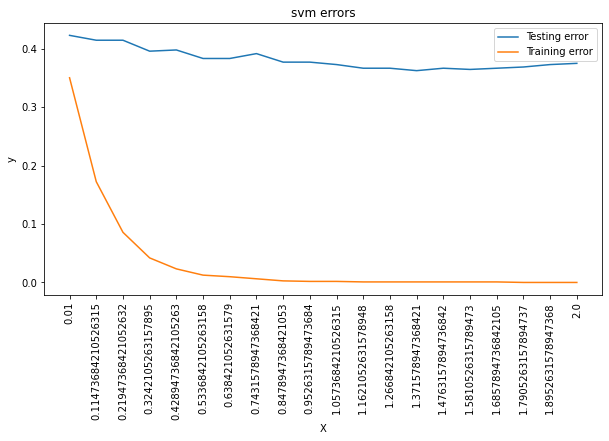

In [25]:
plt.figure(figsize = (10,5))
plt.title("svm errors")
plt.plot(gamma_vals, test_errors, label="Testing error")
plt.plot(gamma_vals, train_errors, label="Training error")
plt.legend()
plt.xticks(ticks = gamma_vals, labels = gamma_vals)
plt.xticks(rotation = 90)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [26]:
# Grid search 

svm = SVC()
param_grid = {'C':list(np.linspace (0.1, 15, 10)),'kernel':['linear','rbf'], 'gamma': list(np.linspace(0.01, 2, 10))}
grid = GridSearchCV(svm,param_grid)

In [27]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.7555555555555558, 3.4111111111111114,
                               5.066666666666666, 6.722222222222222,
                               8.377777777777778, 10.033333333333333,
                               11.68888888888889, 13.344444444444445, 15.0],
                         'gamma': [0.01, 0.23111111111111113,
                                   0.45222222222222225, 0.6733333333333333,
                                   0.8944444444444445, 1.1155555555555556,
                                   1.3366666666666667, 1.557777777777778,
                                   1.778888888888889, 2.0],
                         'kernel': ['linear', 'rbf']})

run time = 2 m 4 s

In [28]:
grid.best_params_

{'C': 1.7555555555555558, 'gamma': 0.45222222222222225, 'kernel': 'rbf'}

In [29]:
y_pred = grid.predict(scaled_X_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.17      0.04      0.07        24
lower_middle       0.69      0.72      0.71       208
      middle       0.54      0.63      0.58       180
upper_middle       0.54      0.41      0.47        63

    accuracy                           0.60       480
   macro avg       0.39      0.36      0.36       480
weighted avg       0.58      0.60      0.59       480



Accuracy tops out at 60%. f1 macro avg at 36%. 

<h3> White Wine </h3>

In [31]:
# Working with red wine data
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101)

In [32]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
svm_model = SVC()
svm_model.fit(scaled_X_train,y_train)

SVC()

In [34]:
y_pred = svm_model.predict(scaled_X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.5639455782312925

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        55
         low       0.67      0.03      0.06        60
lower_middle       0.59      0.60      0.59       438
      middle       0.56      0.76      0.64       666
upper_middle       0.54      0.25      0.34       251

    accuracy                           0.56      1470
   macro avg       0.47      0.33      0.33      1470
weighted avg       0.55      0.56      0.53      1470



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3> Explore different hyperparameters </h3>

In [37]:
# Linear Kernel with various C values
C_vals = list(np.linspace(0.01, 50, 10))
test_errors = []
train_errors = []

for C in C_vals: 
    svm_model = SVC(kernel = 'linear', C = C)
    svm_model.fit(scaled_X_train,y_train)

    y_pred_train = svm_model.predict(scaled_X_train)
    y_pred_test = svm_model.predict(scaled_X_test)

    error_train = 1 - accuracy_score (y_pred_train, y_train)
    error_test = 1 - accuracy_score (y_pred_test, y_test)
    
    train_errors.append(error_train)
    test_errors.append(error_test)

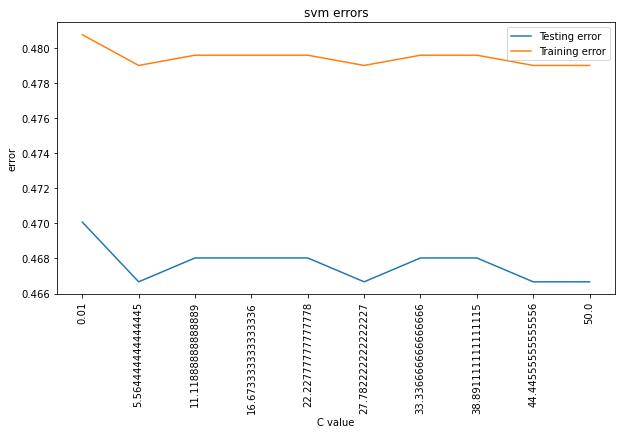

In [38]:
plt.figure(figsize = (10,5))
plt.title("svm errors")
plt.plot(C_vals, test_errors, label="Testing error")
plt.plot(C_vals, train_errors, label="Training error")
plt.legend()
plt.xticks(ticks = C_vals, labels = C_vals)
plt.xticks(rotation = 90)
plt.xlabel("C value")
plt.ylabel("error")
plt.show()

In [39]:
# rbf Kernel with various C values
C_vals = list(np.linspace(0.01, 50, 20))
test_errors = []
train_errors = []

for C in C_vals: 
    svm_model = SVC(kernel = 'rbf', C = C)
    svm_model.fit(scaled_X_train,y_train)

    y_pred_train = svm_model.predict(scaled_X_train)
    y_pred_test = svm_model.predict(scaled_X_test)

    error_train = 1 - accuracy_score (y_pred_train, y_train)
    error_test = 1 - accuracy_score (y_pred_test, y_test)
    
    train_errors.append(error_train)
    test_errors.append(error_test)

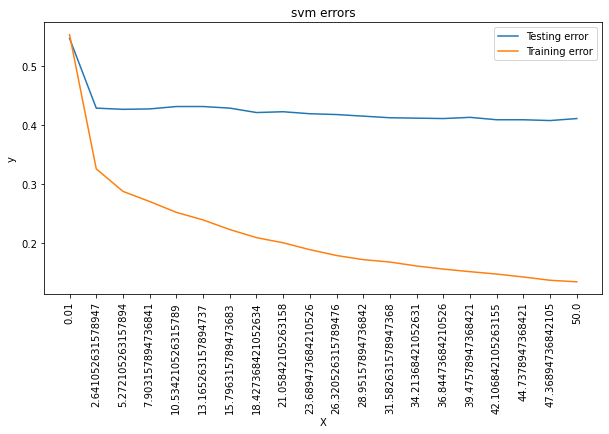

In [40]:
plt.figure(figsize = (10,5))
plt.title("svm errors")
plt.plot(C_vals, test_errors, label="Testing error")
plt.plot(C_vals, train_errors, label="Training error")
plt.legend()
plt.xticks(ticks = C_vals, labels = C_vals)
plt.xticks(rotation = 90)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [41]:
# rbf Kernel with C = 6 and different gamma values
gamma_vals = list(np.linspace(0.01, 2, 20))
test_errors = []
train_errors = []

for gamma in gamma_vals: 
    svm_model = SVC(kernel = 'rbf', C = 6, gamma = gamma)
    svm_model.fit(scaled_X_train,y_train)

    y_pred_train = svm_model.predict(scaled_X_train)
    y_pred_test = svm_model.predict(scaled_X_test)

    error_train = 1 - accuracy_score (y_pred_train, y_train)
    error_test = 1 - accuracy_score (y_pred_test, y_test)
    
    train_errors.append(error_train)
    test_errors.append(error_test)

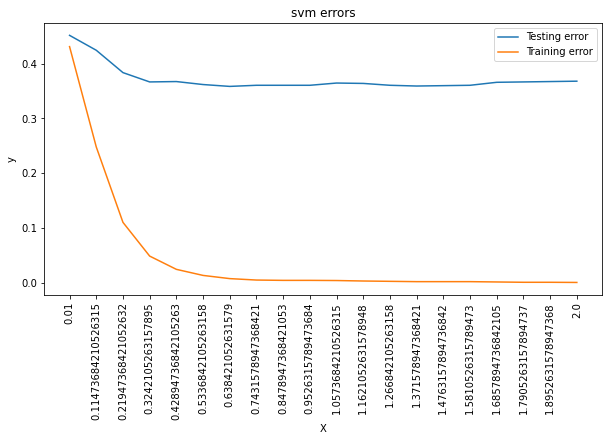

In [42]:
plt.figure(figsize = (10,5))
plt.title("svm errors")
plt.plot(gamma_vals, test_errors, label="Testing error")
plt.plot(gamma_vals, train_errors, label="Training error")
plt.legend()
plt.xticks(ticks = gamma_vals, labels = gamma_vals)
plt.xticks(rotation = 90)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [45]:
# Grid search 

svm = SVC()
param_grid = {'C':list(np.linspace (0.1, 10, 5)),'kernel':['rbf'], 'gamma': list(np.linspace(0.01, 1, 5))}
grid = GridSearchCV(svm,param_grid)

In [46]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 2.575, 5.05, 7.525, 10.0],
                         'gamma': [0.01, 0.2575, 0.505, 0.7525, 1.0],
                         'kernel': ['rbf']})

In [47]:
grid.best_params_

{'C': 2.575, 'gamma': 0.7525, 'kernel': 'rbf'}

In [48]:
y_pred = grid.predict(scaled_X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.74      0.36      0.49        55
         low       0.67      0.10      0.17        60
lower_middle       0.66      0.60      0.63       438
      middle       0.62      0.77      0.69       666
upper_middle       0.67      0.55      0.60       251

    accuracy                           0.64      1470
   macro avg       0.67      0.48      0.52      1470
weighted avg       0.65      0.64      0.63      1470



SVM actually decent for white wine. <br>
Accuracy: 64% <br>
f1 macro avg: 52%

<h3> SVM with SMOTE </h3>

<h3> White Wine </h3>

In [88]:
# Working with white wine data
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101)

In [89]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [90]:
y_train.value_counts()

middle          1532
lower_middle    1019
upper_middle     629
high             125
low              123
Name: quality_label, dtype: int64

In [91]:
under_strategy_white = {'middle': 1000, 'lower_middle': 1000, 'upper_middle': 629, 'low': 123, 'high': 125}
over_strategy_white = {'middle': 1000, 'lower_middle': 1000, 'upper_middle': 800, 'low': 800, 'high': 800}

under_white = RandomUnderSampler(sampling_strategy = under_strategy_white)
over_white = SMOTE (sampling_strategy = over_strategy_white)

scaled_X_train, y_train = under_white.fit_resample(scaled_X_train, y_train)
scaled_X_train, y_train = over_white.fit_resample(scaled_X_train, y_train)

In [92]:
y_train.value_counts()

lower_middle    1000
middle          1000
high             800
low              800
upper_middle     800
Name: quality_label, dtype: int64

In [93]:
# Grid search 

svm = SVC()
param_grid = {'C':list(np.linspace (5, 20, 5)),'kernel':['rbf'], 'gamma': list(np.linspace(0.01, 1, 5))}
grid = GridSearchCV(svm,param_grid)

In [94]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [5.0, 8.75, 12.5, 16.25, 20.0],
                         'gamma': [0.01, 0.2575, 0.505, 0.7525, 1.0],
                         'kernel': ['rbf']})

run time: 2 m 17s

In [95]:
grid.best_params_

{'C': 5.0, 'gamma': 0.7525, 'kernel': 'rbf'}

In [96]:
y_pred = grid.predict(scaled_X_test)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.57      0.36      0.44        55
         low       0.36      0.15      0.21        60
lower_middle       0.62      0.69      0.65       438
      middle       0.64      0.63      0.64       666
upper_middle       0.58      0.61      0.59       251

    accuracy                           0.62      1470
   macro avg       0.55      0.49      0.51      1470
weighted avg       0.61      0.62      0.61      1470



Without smote: <br>
Accuracy: 64% <br>
f1 macro avg: 52% <br> <br>

With smote: <br>
Accuracy: 62% <br>
f1 macro avg: 51% <br> <br>
Result is actually slightly better without SMOTE

<h3> SVM with SMOTE </h3>

<h3> Red Wine </h3>

In [98]:
# Working with white wine data
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=101)

In [99]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [100]:
y_train.value_counts()

lower_middle    473
middle          458
upper_middle    136
low              39
high             13
Name: quality_label, dtype: int64

In [101]:
under_strategy_red = {'middle': 400, 'lower_middle': 400, 'upper_middle': 136, 'low': 39, 'high': 13}
over_strategy_red = {'middle': 400, 'lower_middle': 400, 'upper_middle': 300, 'low': 200, 'high': 200}

under_red = RandomUnderSampler(sampling_strategy = under_strategy_red)
over_red = SMOTE (sampling_strategy = over_strategy_red)

scaled_X_train, y_train = under_red.fit_resample(scaled_X_train, y_train)
scaled_X_train, y_train = over_red.fit_resample(scaled_X_train, y_train)

In [102]:
y_train.value_counts()

lower_middle    400
middle          400
upper_middle    300
high            200
low             200
Name: quality_label, dtype: int64

In [103]:
# Grid search 

svm = SVC()
param_grid = {'C':list(np.linspace (0.1, 15, 5)),'kernel':['rbf'], 'gamma': list(np.linspace(0.01, 2, 5))}
grid = GridSearchCV(svm,param_grid)

In [104]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 3.825, 7.55, 11.275, 15.0],
                         'gamma': [0.01, 0.5075, 1.005, 1.5025, 2.0],
                         'kernel': ['rbf']})

In [105]:
grid.best_params_

{'C': 3.825, 'gamma': 0.5075, 'kernel': 'rbf'}

In [106]:
y_pred = grid.predict(scaled_X_test)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.17      0.20      0.18         5
         low       0.08      0.04      0.05        24
lower_middle       0.67      0.65      0.66       208
      middle       0.52      0.60      0.56       180
upper_middle       0.54      0.44      0.49        63

    accuracy                           0.57       480
   macro avg       0.39      0.39      0.39       480
weighted avg       0.56      0.57      0.56       480



Without smote: <br>
Accuracy:60% <br> 
f1 macro avg: 36%. <br>

With smote: <br>
Accuracy: 57% <br>
f1 macro avg: 39%